In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# 데이터 업로드
from google.colab import files
uploaded = files.upload()

Saving 202501.xlsx to 202501.xlsx


In [5]:
# 데이터 불러오기
df = pd.read_excel('202501.xlsx')

In [6]:
# 날짜 및 시간 추출
df['Pump-Begin'] = pd.to_datetime(df['Pump-Begin'])
df['Date'] = df['Pump-Begin'].dt.date
df['Hour'] = df['Pump-Begin'].dt.hour

In [7]:
# Day(07-18시)/Night(19-06시) 구분
df['Period'] = np.where(df['Hour'].between(7,18), 'Day', 'Night')

In [9]:
# Day/Night 평균 농도 계산 (Al, Si, S, K, Ca, Fe, Zn 대상)
target_metals = ['Al(ng/m3)',
                 'Si(ng/m3)',
                 'S(ng/m3)',
                 'K(ng/m3)',
                 'Ca(ng/m3)',
                 'Fe(ng/m3)',
                 'Zn(ng/m3)']
period_avg = df.groupby(['Period'])[target_metals].mean()

In [10]:
# 금속별 데이터 분리
results = {}
for metal in target_metals:
    day_values = df[df['Period']=='Day'][metal] # Day 데이터만 선택
    night_values = df[df['Period']=='Night'][metal] # Night 데이터만 선택

# 평균과 통계적 차이 확인 (t-test)
    t_stat, p_val = ttest_ind(day_values, night_values, nan_policy='omit') # p-value < 0.05면 농도 차이 유의하다 판단
    results[metal] = {'t-stat': t_stat, 'p-value': p_val}

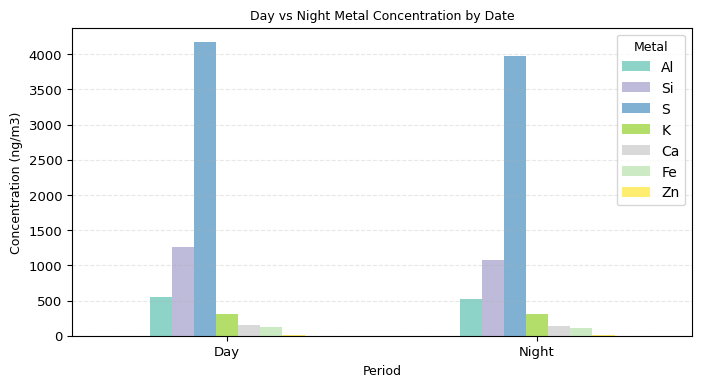

Day vs Night t-test 결과:
Al(ng/m3): t=1.81, p=0.0701
Si(ng/m3): t=2.34, p=0.0199
S(ng/m3): t=1.31, p=0.1901
K(ng/m3): t=0.44, p=0.6636
Ca(ng/m3): t=2.66, p=0.0080
Fe(ng/m3): t=1.67, p=0.0956
Zn(ng/m3): t=1.32, p=0.1868


In [11]:
# Day vs Night 막대 그래프
period_avg.plot(kind='bar',
                figsize=(8,4),
                width=0.5,
                colormap='Set3')

# 그래프 기본 설정
plt.title('Day vs Night Metal Concentration by Date', fontsize=9)
plt.xlabel('Period', fontsize=9)
plt.ylabel('Concentration (ng/m3)', fontsize=9)
plt.xticks(rotation=0, fontsize=9.5)
plt.yticks(fontsize=9.5)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 범례 설정
plt.legend(loc='upper right',
           labels=['Al', 'Si', 'S', 'K', 'Ca', 'Fe', 'Zn'],
           fontsize=10,
           title='Metal',
           title_fontsize=9)

# 그래프 결과 출력
plt.show()

# t-test 결과 출력
print("Day vs Night t-test 결과:")
for metal, res in results.items():
    print(f"{metal}: t={res['t-stat']:.2f}, p={res['p-value']:.4f}") # p < 0.05 : 농도 차이 유의, t > 0 : Daytime 평균이 높음